In [2]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import nan # importing nan to avoid overlapping in plotting datas
from datetime import datetime
# from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
# path of our dataframe
data_path =  "../../../temperatura1_A.csv"

In [68]:
# loading in pandas dataframe
df = pd.read_csv(
  data_path,
  sep = ";", # not a CSV, separator is ';'
  header = None, # no header
  dtype = {'0' : str, '1': str, '2': str, '3' : np.float64, '4':int}
  ) 


In [69]:
# define a header 
df= df.set_axis(
    ['label', 'date', 'time', 'value','validation_code'],
    axis = 1,
    inplace = False

)

In [70]:
df #Printing table

,label,date,time,value,validation_code
0,T0009,01/01/2014,00:00,-2.1,1
1,T0009,01/01/2014,00:15,-2.3,1
2,T0009,01/01/2014,00:30,-2.2,1
3,T0009,01/01/2014,00:45,-2.3,1
4,T0009,01/01/2014,01:00,-2.5,1
...,...,...,...,...,...
11763686,T0227,31/12/2021,22:45,8.1,1
11763687,T0227,31/12/2021,23:00,8.2,1
11763688,T0227,31/12/2021,23:15,8.1,1
11763689,T0227,31/12/2021,23:30,8.0,1


In [71]:
# Reducing every validation code in good or bad
# 0 "good", 1 "bad"
df["validation_code"] = np.where(df["validation_code"] == 1, 0, 1)
print(np.unique(df["validation_code"],return_counts=True,return_index=True))

(array([0, 1]), array([    0, 43394]), array([11725330,    38361]))


In [72]:
print(df.iloc[43394])

label                   T0009
date               29/03/2015
time                    01:30
value                     0.0
validation_code             1
Name: 43394, dtype: object


In [76]:
string_to_plot = "29/03/2015" #@param {type:"string"}
station_num = "T0009" #@param {type:"string"}

# Converting string in to datetime
df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')
date_to_plot = datetime.strptime(string_to_plot, '%d/%m/%Y')

# Create a dataframe of only that station in that day
df_filtered = df[(df['label'] == station_num) &
                  (df['date'] == date_to_plot)]

# Split good and bad data into 2 samples 
# y_good_samples = np.where(df_filtered["validation_code"] == 0, df_filtered.value, nan)
y_signal = df_filtered.value
# y_bad_samples = np.where(df_filtered["validation_code"] == 0, nan, df_filtered.value)
y_outliers = np.where(df_filtered["validation_code"] == 0, nan, df_filtered.value)

# Define the x axis value
x_plot = df_filtered.time
df_filtered

,label,date,time,value,validation_code
43390,T0009,2015-03-29,00:00,7.2,0
43391,T0009,2015-03-29,00:15,7.3,0
43392,T0009,2015-03-29,00:30,6.7,0
43393,T0009,2015-03-29,00:45,6.4,0
43394,T0009,2015-03-29,01:30,0.0,1
...,...,...,...,...,...
43477,T0009,2015-03-29,22:45,6.4,0
43478,T0009,2015-03-29,23:00,6.2,0
43479,T0009,2015-03-29,23:15,6.4,0
43480,T0009,2015-03-29,23:30,6.1,0


/tmp/ipykernel_935/2245474891.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_plot,rotation=30)


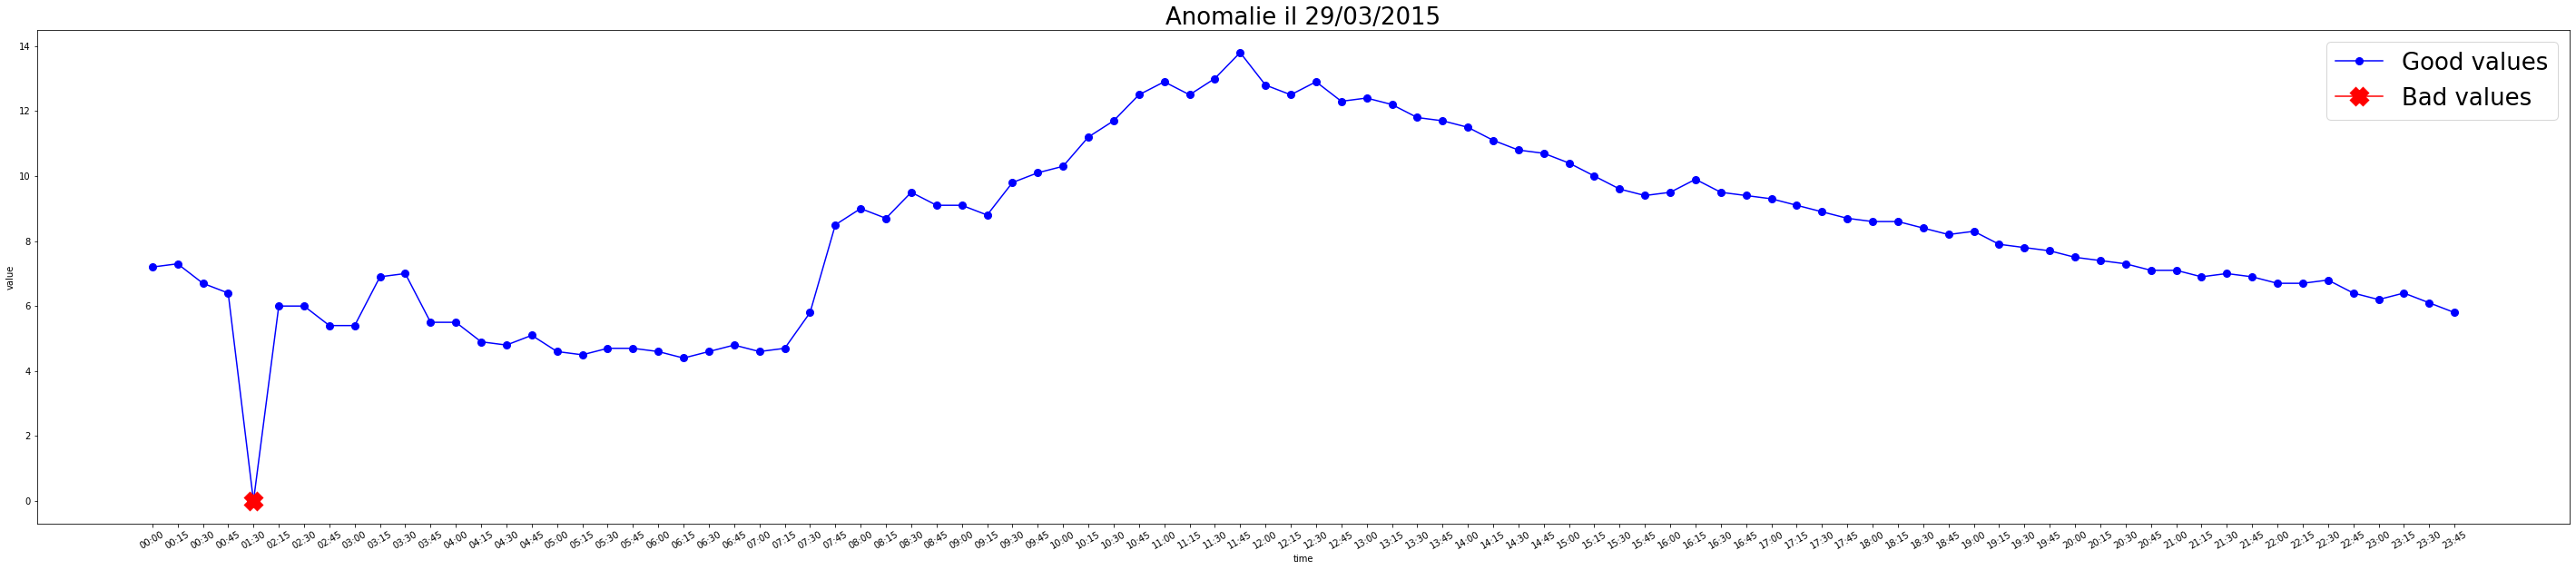

In [78]:
# Reshaping the plot
f = plt.figure()
f.set_figwidth(50)
f.set_figheight(10)

# Create subplot
ax = plt.subplot()

# Set labels
plt.title('Anomalie il ' +string_to_plot ,fontsize = 26)
plt.ylabel('value')
plt.xlabel('time')

# Define tick label to avoid overlapping
ax.set_xticklabels(x_plot,rotation=30)

# Plotting datas with different markers
plt.plot(x_plot, y_signal, "o-",ms=8,color="blue")	
plt.plot(x_plot, y_outliers, "x-",ms=15,mew=10,color="red")

# Making a legend
ax.legend(['Good values', 'Bad values'], prop={'size': 26})

# Visualize
plt.show()